# Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

# Housing Price Data Analysis

The keys sections in this data analysis are:
- Reading and understanding the data
- Cleaning the data
- Preparing the data for modelling
- Model creation and evaluation
- Recommendations

## Reading and understanding the data

### Importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [2]:
path = input("Enter the path to data file: ") #Enter the path to the file to be used by replacing all the '\' using '\\' or '/'

Enter the path to data file: D:\upGrad\.CONTENT\Assignments\Advanced Regression Assignment


In [34]:
data = pd.read_csv(path+'/train.csv') #the path will be used to read the file
data.head() #checking if data from the csv file is loading properly

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

### Checking the structure of data

In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We can see that this dataset contains 1460 rows and 81 columns.There are missing values present in the data.

In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [7]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


The names of columns present in the dataset are:
'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'

The 'SalePrice' column will be the target variable for this analysis.

### Data exploration

In [395]:
# all numeric (float and int) variables in the dataset
numeric_col = data.select_dtypes(include=['float64', 'int64'])
numeric_col.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0   1          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0          0            0         0        0       2    2008     208500
1   2          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0          0            0         0        0       5    2007     181500
2   3          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0          0            0         0        0       9    2008     223500
3   4          70         60.0     9550            7            5       1915          1970         0.0         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272          0            0         0        0       2    2006     140000
4   5          60         84.0    14260            8            5       2000          2000       350.0         655           0        490         1145      1145      1053             0       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0          0            0         0        0      12    2008     250000

In [396]:
numeric_col = numeric_col.drop(['Id','MSSubClass','OverallQual','OverallCond'], axis=1)
numeric_col.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0         65.0     8450       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0          0            0         0        0       2    2008     208500
1         80.0     9600       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0          0            0         0        0       5    2007     181500
2         68.0    11250       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0          0            0         0        0       9    2008     223500
3         60.0     9550       1915          1970         0.0         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272          0            0         0        0       2    2006     140000
4         84.0    14260       2000          2000       350.0         655           0        490         1145      1145      1053             0       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0          0            0         0        0      12    2008     250000

<Figure size 1440x720 with 0 Axes>

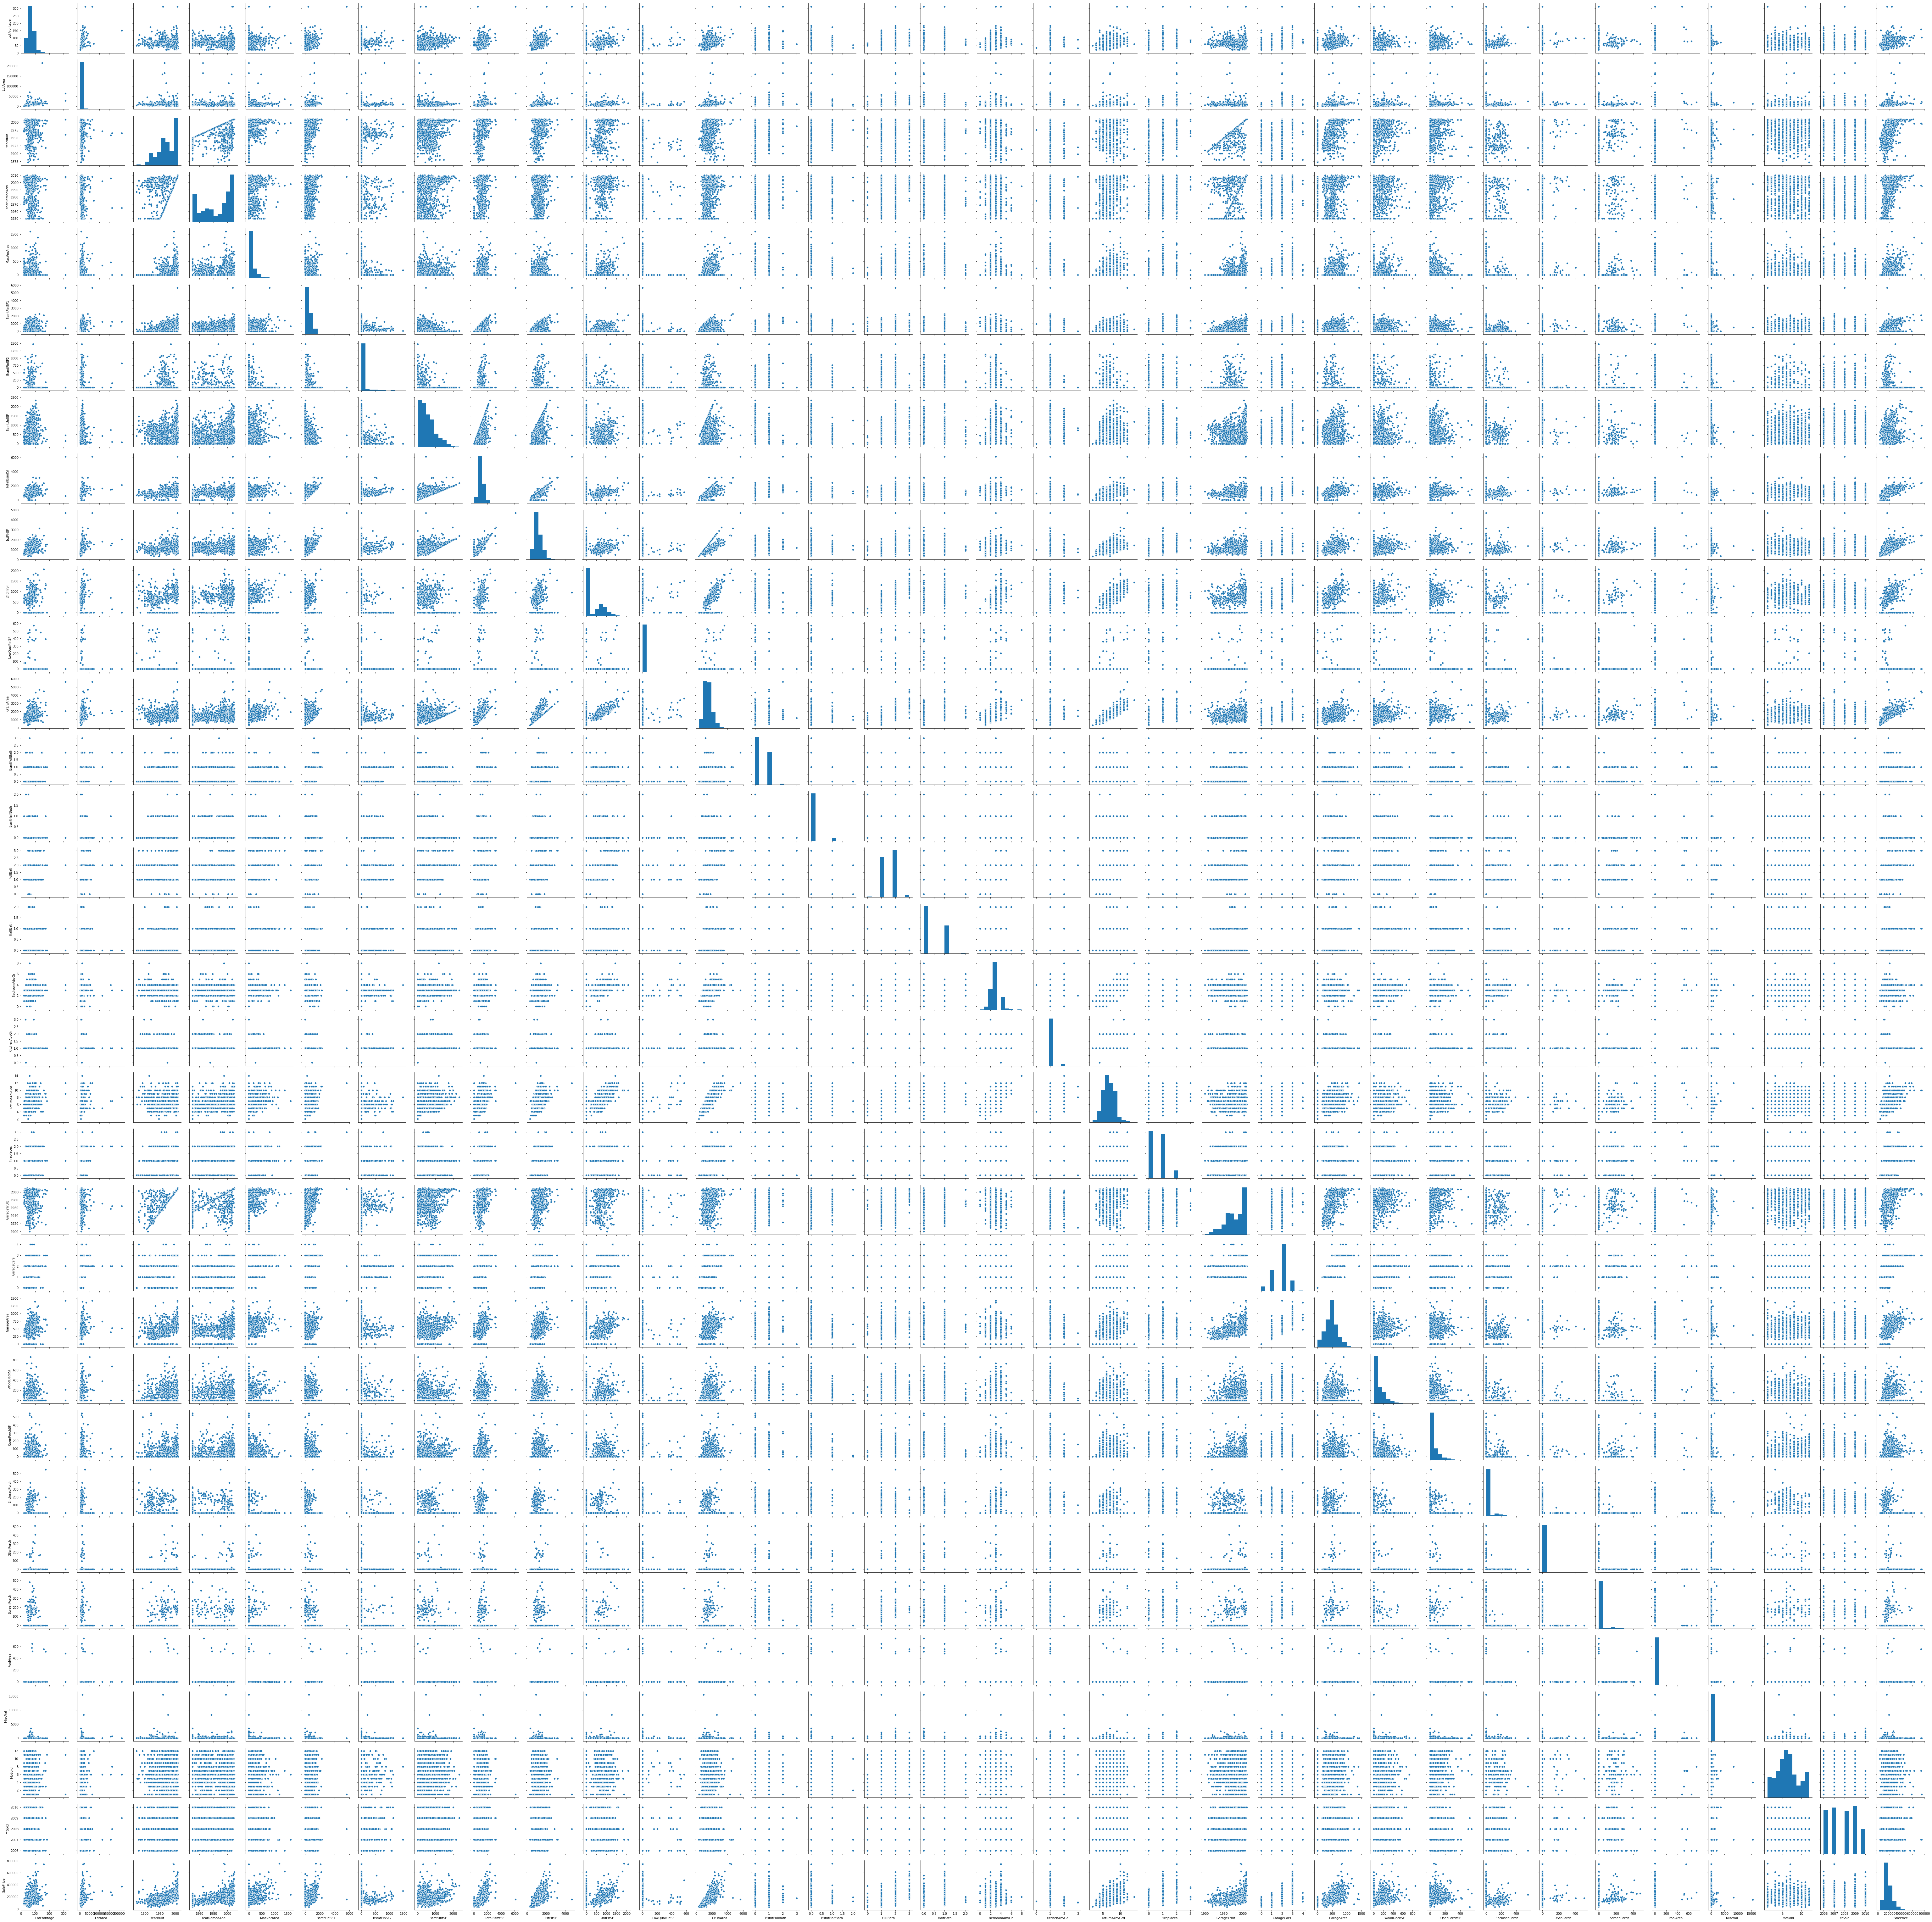

In [397]:
#creating a pairwise plot of the linear variables
plt.figure(figsize=(20, 10))
sns.pairplot(numeric_col)
plt.show()

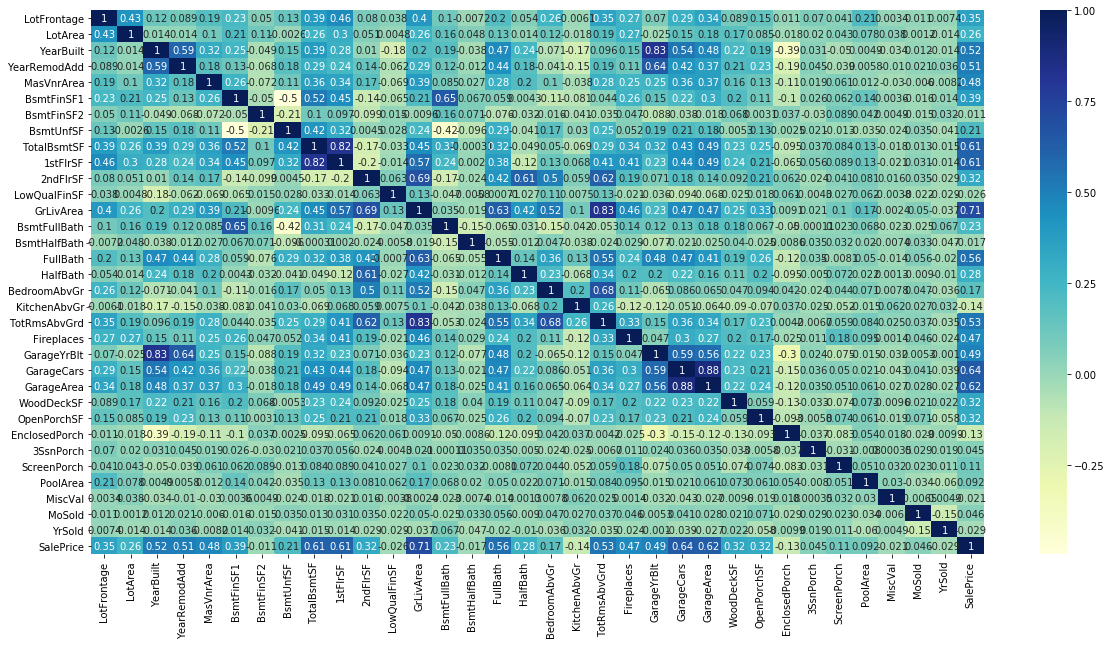

In [399]:
# plotting a heatmap of correlations between the linear variables to better understand the relations
plt.figure(figsize=(20,10))
sns.heatmap(numeric_col.corr(), cmap="YlGnBu", annot=True)
plt.show()

We can see above that some of the variables are highly correlated such as 'GarageYrBlt'/'YearBuilt', 'TotRmsAbvGrd'/'GrLivArea', 'GarageArea'/'GarageCars', '1stFlrSF'/'TotalBsmtSF'.

The 'SalePrice' variable has high positive correlations with 'GrLivArea','1stFlrSF','GarageCars','GarageArea','TotalBsmtSF'. However, some variables such as 'BsmtFinSF2','LowQualFinSF','KitchenAbvGrd','EnclosedPorch','ScreenPorch','PoolArea' etc. have negligible correlations.

## Cleaning the data

### Checking and treating missing values

In [93]:
data.isnull().values.any() #checking for missing values

True

In [94]:
round(100*(data.isnull().sum())/len(data), 2) #percentage of missing values by column

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

We will delete the columns with extremely high percentage of missing values since imputing such missing values will only introduce bias in the dataset.

In [125]:
data2 = data.loc[:, data.isnull().mean() <= .8] #deleting columns with 80% or more missing data
round(100*(data2.isnull().sum())/len(data2), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

The column 'FireplaceQu' denotes the quality of fireplace on the property which has approximately 47% missing data. This might be present because there are no fireplace on the property. Hence, we will impute these missing data with the value 'NA' in the column.

In [127]:
data2['FireplaceQu'] = data2['FireplaceQu'].replace(np.NaN,"NA")
data2['FireplaceQu'].value_counts() #checking if the data in the column has become too skewed

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [128]:
round(100*(data2.isnull().sum())/len(data2), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [129]:
print(data2['LotFrontage'].median())
print(data2['LotFrontage'].mean())

69.0
70.04995836802665


The 'LotFrontage' column contains linear data with indicates the width of street connected to the property. Hence, the missing data in this column does not indicate anything. We can choose either mean or median value to impute the missing values since both are similar to each other (69 and 70.05). Hence, we will impute the median value of the column and see the distribution of the column.

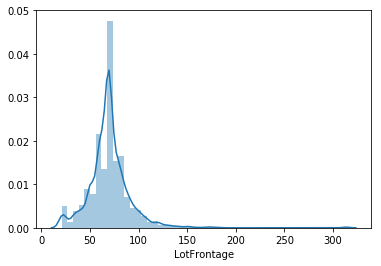

In [130]:
data2['LotFrontage'].fillna((data2['LotFrontage'].median()), inplace=True)
sns.distplot(data2['LotFrontage'])
plt.show()

In [133]:
round(100*(data2.isnull().sum())/len(data2), 2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea 

In [267]:
# deleting rows with missing values
clean_data = data2[~(data2.isnull().sum(axis=1) > 0)]
round(100*(clean_data.isnull().sum())/len(clean_data), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [268]:
print(data2.shape)
print(clean_data.shape)

(1460, 77)
(1338, 77)


Now, there is no missing data in the dataset and we have retained around 91.6% of the rows.

### Checking and treating skewed data columns

In [269]:
clean_data['MSSubClass'].value_counts() #checking the types of dwellings on sale

20     502
60     294
50     129
120     86
160     61
80      57
70      57
30      51
90      28
190     21
85      19
75      14
45       9
180      6
40       4
Name: MSSubClass, dtype: int64

The data type of this column is 'integer' but it contains categorical data. Also, we can see some of the categories can be clubbed together. Hence, we will create new categories in this column namely:
 - 1_Str -> 1 story
 - 1.5_Str -> 1.5 stories
 - 2_Str -> 2 stories
 - 2.5_Str -> 2.5 stories
 - Split_Multi -> Split, split-foyer or multilevel
 - Duplex -> Duplex
 - PUD -> Planned Unit Development (all stories)
 - 2_Fam -> 2 families

In [270]:
clean_data['MSSubClass'] = clean_data['MSSubClass'].replace([20,30,40],"1_Str")
clean_data['MSSubClass'] = clean_data['MSSubClass'].replace([45,50],"1.5_Str")
clean_data['MSSubClass'] = clean_data['MSSubClass'].replace([60,70],"2_Str")
clean_data['MSSubClass'] = clean_data['MSSubClass'].replace(75,"2.5_Str")
clean_data['MSSubClass'] = clean_data['MSSubClass'].replace([80,85],"Split_Multi")
clean_data['MSSubClass'] = clean_data['MSSubClass'].replace(90,"Duplex")
clean_data['MSSubClass'] = clean_data['MSSubClass'].replace([120,150,160,180],"PUD")
clean_data['MSSubClass'] = clean_data['MSSubClass'].replace(190,"2_Fam")
clean_data['Property_Type'] = clean_data['MSSubClass']
clean_data = clean_data.drop('MSSubClass', axis=1)
clean_data['Property_Type'].value_counts()

1_Str          557
2_Str          351
PUD            153
1.5_Str        138
Split_Multi     76
Duplex          28
2_Fam           21
2.5_Str         14
Name: Property_Type, dtype: int64

We still see that some of the categories with low variance can be clubbed further as 'Others'.

In [271]:
clean_data['Property_Type'] = clean_data['Property_Type'].replace(['Split_Multi','Duplex','2_Fam','2.5_Str'],'Others')
clean_data['Property_Type'].value_counts()

1_Str      557
2_Str      351
PUD        153
Others     139
1.5_Str    138
Name: Property_Type, dtype: int64

In [272]:
clean_data['MSZoning'].value_counts()  #checking the zones of dwellings for sale

RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64

Most of the buildings on sale are in low-density residential zones. Hence, we can instead use a column 'LowResZone' to indicate whether the property is in a low-density residential zone or not.

In [273]:
def Res_Zone(x):
    if x['MSZoning'] == 'RL':
        return 'Yes'
    else:
        return 'No'

clean_data["LowResZone"] = clean_data.apply(lambda x: Res_Zone(x), axis=1)
clean_data = clean_data.drop("MSZoning", axis=1)
clean_data["LowResZone"].value_counts()

Yes    1066
No      272
Name: LowResZone, dtype: int64

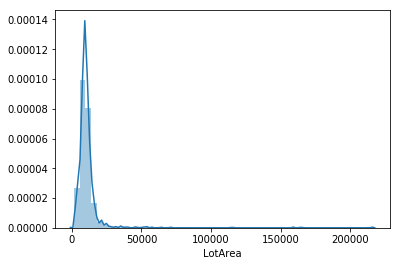

In [274]:
sns.distplot(clean_data['LotArea'])
plt.show()

This distribution shows that this data might have some outliers.

In [275]:
clean_data['Street'].value_counts()

Pave    1333
Grvl       5
Name: Street, dtype: int64

The data in the column showing the type of road access to the property in question seems to be highly skewed. So, this column can be dropped.

In [276]:
clean_data['LotShape'].value_counts()

Reg    829
IR1    459
IR2     40
IR3     10
Name: LotShape, dtype: int64

Most of the properties are either regular or slightly irregular in shape. We can convert it into a single variable 'RegLotShape' that shows whether the lot is regular in shape or not.

In [277]:
def Lot_Shape(x):
    if x['LotShape'] == 'Reg':
        return 'Yes'
    else:
        return 'No'

clean_data["RegLotShape"] = clean_data.apply(lambda x: Lot_Shape(x), axis=1)
clean_data = clean_data.drop("LotShape", axis=1)
clean_data["RegLotShape"].value_counts()

Yes    829
No     509
Name: RegLotShape, dtype: int64

In [278]:
clean_data['LandContour'].value_counts()

Lvl    1206
Bnk      52
HLS      48
Low      32
Name: LandContour, dtype: int64

In [279]:
clean_data['Utilities'].value_counts()

AllPub    1337
NoSeWa       1
Name: Utilities, dtype: int64

In [280]:
clean_data['LotConfig'].value_counts()

Inside     957
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: LotConfig, dtype: int64

In [281]:
#creating new column 'InsideLot' to better represent the data in column 'LotConfig'
def Lot_Configuration(x):
    if x['LotConfig'] == 'Inside':
        return 'Yes'
    else:
        return 'No'

clean_data["InsideLot"] = clean_data.apply(lambda x: Lot_Configuration(x), axis=1)
clean_data = clean_data.drop("LotConfig", axis=1)
clean_data["InsideLot"].value_counts()

Yes    957
No     381
Name: InsideLot, dtype: int64

In [282]:
clean_data['LandSlope'].value_counts()

Gtl    1265
Mod      61
Sev      12
Name: LandSlope, dtype: int64

In [283]:
clean_data['Neighborhood'].value_counts()

NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [286]:
clean_data['Neighborhood'] = clean_data['Neighborhood'].replace(['SWISU','Blmngtn','BrDale','MeadowV','Veenker','NPkVill',
                                                                 'Blueste'],'Others')
clean_data['Neighborhood'].value_counts()

NAmes      209
CollgCr    146
OldTown    100
Others      86
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
Name: Neighborhood, dtype: int64

In [287]:
clean_data['Condition1'].value_counts()

Norm      1162
Feedr       63
Artery      43
RRAn        26
PosN        19
RRAe        10
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [288]:
#creating new column 'NormCond' to better represent the data in column 'Condition1'
def Condition(x):
    if x['Condition1'] == 'Norm':
        return 'Yes'
    else:
        return 'No'

clean_data["NormCond"] = clean_data.apply(lambda x: Condition(x), axis=1)
clean_data = clean_data.drop("Condition1", axis=1)
clean_data["NormCond"].value_counts()

Yes    1162
No      176
Name: NormCond, dtype: int64

In [289]:
clean_data['Condition2'].value_counts()

Norm      1324
Feedr        5
RRNn         2
PosN         2
Artery       2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [290]:
clean_data['BldgType'].value_counts()

1Fam      1138
TwnhsE     112
Twnhs       38
Duplex      28
2fmCon      22
Name: BldgType, dtype: int64

In [291]:
#creating new column 'Detach1Fam' to better represent the data in column 'BldgType'
def Bldg_Type(x):
    if x['BldgType'] == '1Fam':
        return 'Yes'
    else:
        return 'No'

clean_data["Detach1Fam"] = clean_data.apply(lambda x: Bldg_Type(x), axis=1)
clean_data = clean_data.drop("BldgType", axis=1)
clean_data["Detach1Fam"].value_counts()

Yes    1138
No      200
Name: Detach1Fam, dtype: int64

In [292]:
clean_data['HouseStyle'].value_counts()

1Story    657
2Story    426
1.5Fin    134
SLvl       64
SFoyer     30
1.5Unf     11
2.5Unf     10
2.5Fin      6
Name: HouseStyle, dtype: int64

In [293]:
clean_data['HouseStyle'] = clean_data['HouseStyle'].replace(['SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
clean_data['HouseStyle'].value_counts()

1Story    657
2Story    426
1.5Fin    134
Others    121
Name: HouseStyle, dtype: int64

In [294]:
clean_data['OverallQual'].value_counts()

6     359
5     351
7     312
8     165
4      81
9      43
10     17
3       8
2       2
Name: OverallQual, dtype: int64

In [295]:
clean_data['OverallCond'].value_counts()

5    770
6    233
7    183
8     68
4     46
9     20
3     15
2      3
Name: OverallCond, dtype: int64

In [296]:
clean_data['RoofStyle'].value_counts()

Gable      1037
Hip         272
Flat         11
Gambrel      10
Mansard       6
Shed          2
Name: RoofStyle, dtype: int64

In [297]:
#creating new column 'GableRoof' to better represent the data in column 'RoofStyle'
def Roof_Type(x):
    if x['RoofStyle'] == 'Gable':
        return 'Yes'
    else:
        return 'No'

clean_data["GableRoof"] = clean_data.apply(lambda x: Roof_Type(x), axis=1)
clean_data = clean_data.drop("RoofStyle", axis=1)
clean_data["GableRoof"].value_counts()

Yes    1037
No      301
Name: GableRoof, dtype: int64

In [298]:
clean_data['RoofMatl'].value_counts()

CompShg    1314
Tar&Grv       9
WdShngl       6
WdShake       5
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

In [299]:
clean_data['Exterior1st'].value_counts()

VinylSd    486
HdBoard    211
MetalSd    201
Wd Sdng    183
Plywood    100
CemntBd     52
BrkFace     44
Stucco      21
WdShing     20
AsbShng     15
Stone        2
ImStucc      1
BrkComm      1
CBlock       1
Name: Exterior1st, dtype: int64

In [300]:
clean_data['Exterior1st'] = clean_data['Exterior1st'].replace(['CemntBd','BrkFace','Stucco','WdShing','AsbShng','Stone',
                                                               'ImStucc','BrkComm','CBlock'],'Others')
clean_data['Exterior1st'].value_counts()

VinylSd    486
HdBoard    211
MetalSd    201
Wd Sdng    183
Others     157
Plywood    100
Name: Exterior1st, dtype: int64

In [301]:
clean_data['Exterior2nd'].value_counts()

VinylSd    475
HdBoard    197
MetalSd    197
Wd Sdng    176
Plywood    127
CmentBd     51
Wd Shng     32
Stucco      23
BrkFace     22
AsbShng     16
ImStucc     10
Brk Cmn      6
AsphShn      2
Stone        2
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [302]:
clean_data['Exterior2nd'] = clean_data['Exterior2nd'].replace(['CmentBd','Wd Shng','Stucco','BrkFace','AsbShng',
                                                               'Stone','ImStucc','Brk Cmn','AsphShn','CBlock'],'Other')
clean_data['Exterior2nd'].value_counts()

VinylSd    475
HdBoard    197
MetalSd    197
Wd Sdng    176
Other      166
Plywood    127
Name: Exterior2nd, dtype: int64

In [303]:
clean_data['MasVnrType'].value_counts()

None       763
BrkFace    432
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

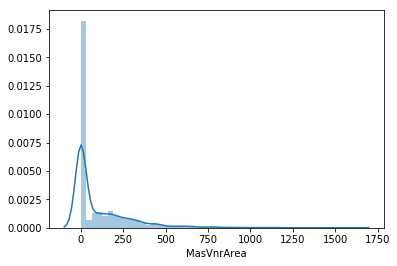

In [304]:
sns.distplot(clean_data['MasVnrArea'])
plt.show()

In [305]:
clean_data['ExterQual'].value_counts()

TA    803
Gd    477
Ex     51
Fa      7
Name: ExterQual, dtype: int64

In [306]:
clean_data['ExterCond'].value_counts()

TA    1183
Gd     137
Fa      16
Ex       2
Name: ExterCond, dtype: int64

In [307]:
clean_data['Foundation'].value_counts()

PConc     620
CBlock    580
BrkTil    129
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [308]:
clean_data['Foundation'] = clean_data['Foundation'].replace(['BrkTil','Wood','Stone'],'Other')
clean_data['Foundation'].value_counts()

PConc     620
CBlock    580
Other     138
Name: Foundation, dtype: int64

In [309]:
clean_data['BsmtQual'].value_counts()

TA    594
Gd    592
Ex    120
Fa     32
Name: BsmtQual, dtype: int64

In [310]:
clean_data['BsmtExposure'].value_counts()

No    887
Av    213
Gd    127
Mn    111
Name: BsmtExposure, dtype: int64

In [311]:
clean_data['BsmtFinType1'].value_counts()

GLQ    402
Unf    392
ALQ    209
BLQ    141
Rec    125
LwQ     69
Name: BsmtFinType1, dtype: int64

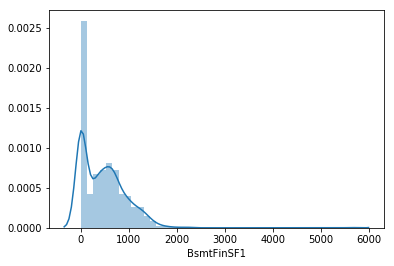

In [312]:
sns.distplot(clean_data['BsmtFinSF1'])
plt.show()

In [313]:
clean_data['BsmtFinType2'].value_counts()

Unf    1176
Rec      53
LwQ      46
BLQ      32
ALQ      19
GLQ      12
Name: BsmtFinType2, dtype: int64

In [314]:
#creating new column 'MultiTypBsmt' to better represent the data in column 'BsmtFinType2'
def Bsmt_Type(x):
    if x['BsmtFinType2'] == 'Unf' or x['BsmtFinType2'] == 'NA':
        return 'No'
    else:
        return 'Yes'

clean_data["MultiTypBsmt"] = clean_data.apply(lambda x: Bsmt_Type(x), axis=1)
clean_data = clean_data.drop("BsmtFinType2", axis=1)
clean_data["MultiTypBsmt"].value_counts()

No     1176
Yes     162
Name: MultiTypBsmt, dtype: int64

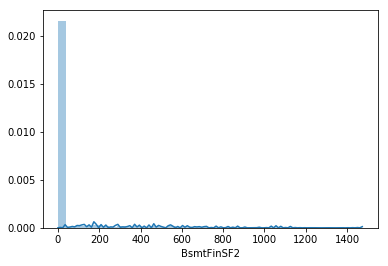

In [315]:
sns.distplot(clean_data['BsmtFinSF2'])
plt.show()

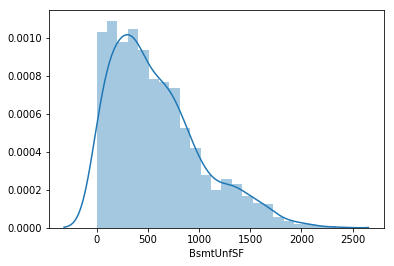

In [316]:
sns.distplot(clean_data['BsmtUnfSF'])
plt.show()

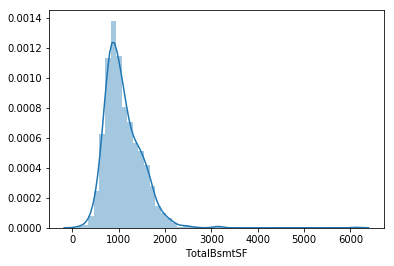

In [317]:
sns.distplot(clean_data['TotalBsmtSF'])
plt.show()

In [318]:
clean_data['Heating'].value_counts()

GasA    1318
GasW      16
Grav       3
OthW       1
Name: Heating, dtype: int64

In [319]:
clean_data['HeatingQC'].value_counts()

Ex    704
TA    380
Gd    217
Fa     36
Po      1
Name: HeatingQC, dtype: int64

In [320]:
clean_data['CentralAir'].value_counts()

Y    1277
N      61
Name: CentralAir, dtype: int64

In [321]:
clean_data['Electrical'].value_counts()

SBrkr    1242
FuseA      76
FuseF      17
FuseP       2
Mix         1
Name: Electrical, dtype: int64

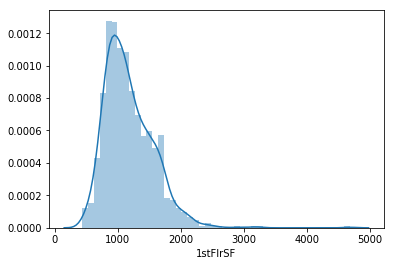

In [322]:
sns.distplot(clean_data['1stFlrSF']) #plotting the area of first floor in sq. ft.
plt.show()

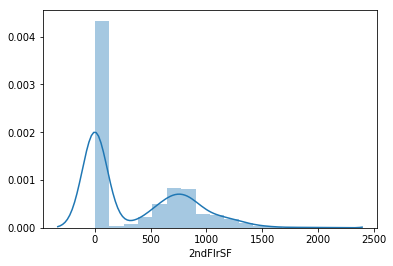

In [323]:
sns.distplot(clean_data['2ndFlrSF']) #plotting the area of second floor in sq. ft.
plt.show()

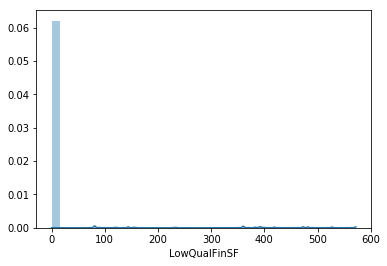

In [325]:
sns.distplot(clean_data['LowQualFinSF'])
plt.show()

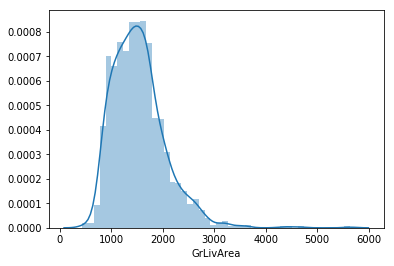

In [326]:
sns.distplot(clean_data['GrLivArea'])
plt.show()

In [327]:
clean_data['BsmtFullBath'].value_counts()

0    764
1    561
2     13
Name: BsmtFullBath, dtype: int64

In [328]:
#Recreating column 'BsmtFullBath' to better represent the data
def Bath_Type(x):
    if x['BsmtFullBath'] != 0 :
        return 'Yes'
    else:
        return 'No'

clean_data["BsmtFullBath"] = clean_data.apply(lambda x: Bath_Type(x), axis=1)
clean_data["BsmtFullBath"].value_counts()

No     764
Yes    574
Name: BsmtFullBath, dtype: int64

In [329]:
clean_data['BsmtHalfBath'].value_counts()

0    1258
1      79
2       1
Name: BsmtHalfBath, dtype: int64

In [330]:
clean_data['FullBath'].value_counts()

2    720
1    581
3     29
0      8
Name: FullBath, dtype: int64

In [331]:
clean_data['HalfBath'].value_counts()

0    808
1    521
2      9
Name: HalfBath, dtype: int64

In [332]:
#Recreating column 'HalfBath' to better represent the data
def HalfBath_Type(x):
    if x['HalfBath'] != 0 :
        return 'Yes'
    else:
        return 'No'

clean_data["HalfBath"] = clean_data.apply(lambda x: HalfBath_Type(x), axis=1)
clean_data["HalfBath"].value_counts()

No     808
Yes    530
Name: HalfBath, dtype: int64

In [333]:
clean_data['KitchenQual'].value_counts()

TA    650
Gd    568
Ex     97
Fa     23
Name: KitchenQual, dtype: int64

In [334]:
clean_data['TotRmsAbvGrd'].value_counts()

6     379
7     309
5     248
8     171
4      79
9      69
10     44
11     18
3      12
12      9
Name: TotRmsAbvGrd, dtype: int64

In [335]:
clean_data['Functional'].value_counts()

Typ     1254
Min2      30
Min1      28
Mod       11
Maj1      10
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [336]:
clean_data['Fireplaces'].value_counts()

1    631
0    591
2    111
3      5
Name: Fireplaces, dtype: int64

In [337]:
#Recreating column 'Fireplaces' to better represent the data
def FireplaceOnProperty(x):
    if x['Fireplaces'] != 0 :
        return 'Yes'
    else:
        return 'No'

clean_data["Fireplaces"] = clean_data.apply(lambda x: FireplaceOnProperty(x), axis=1)
clean_data["Fireplaces"].value_counts()

Yes    747
No     591
Name: Fireplaces, dtype: int64

In [338]:
clean_data['FireplaceQu'].value_counts()

NA    591
Gd    370
TA    304
Fa     33
Ex     23
Po     17
Name: FireplaceQu, dtype: int64

In [339]:
clean_data['GarageType'].value_counts()

Attchd     852
Detchd     369
BuiltIn     85
Basment     19
CarPort      7
2Types       6
Name: GarageType, dtype: int64

In [340]:
clean_data['GarageType'] = clean_data['GarageType'].replace(['BuiltIn','Basment','CarPort','2Types'],'Other')
clean_data['GarageType'].value_counts()

Attchd    852
Detchd    369
Other     117
Name: GarageType, dtype: int64

In [341]:
clean_data['GarageFinish'].value_counts()

Unf    580
RFn    413
Fin    345
Name: GarageFinish, dtype: int64

In [342]:
#Recreating column 'GarageFinish' to better represent the data
def Garage_Finish(x):
    if x['GarageFinish'] == 'Unf' :
        return 'No'
    else:
        return 'Yes'

clean_data["GarageFinish"] = clean_data.apply(lambda x: Garage_Finish(x), axis=1)
clean_data["GarageFinish"].value_counts()

Yes    758
No     580
Name: GarageFinish, dtype: int64

In [344]:
clean_data['GarageCars'].value_counts()

2    793
1    361
3    179
4      5
Name: GarageCars, dtype: int64

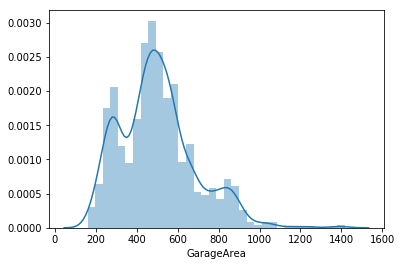

In [345]:
sns.distplot(clean_data['GarageArea'])
plt.show()

In [346]:
clean_data['GarageQual'].value_counts()

TA    1270
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [347]:
clean_data['GarageCond'].value_counts()

TA    1287
Fa      33
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [348]:
clean_data['PavedDrive'].value_counts()

Y    1257
N      54
P      27
Name: PavedDrive, dtype: int64

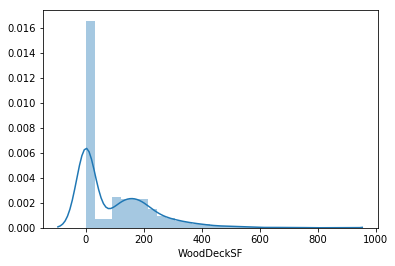

In [349]:
sns.distplot(clean_data['WoodDeckSF'])
plt.show()

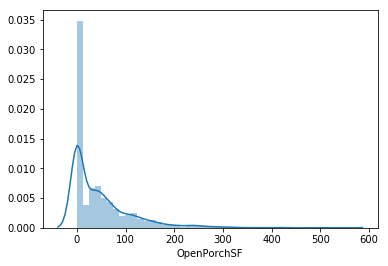

In [350]:
sns.distplot(clean_data['OpenPorchSF'])
plt.show()

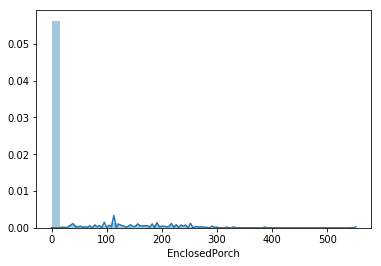

In [351]:
sns.distplot(clean_data['EnclosedPorch'])
plt.show()

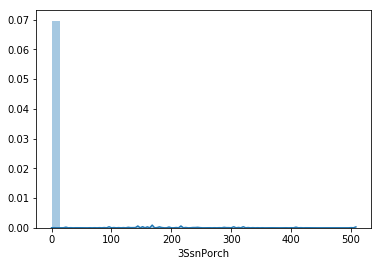

In [352]:
sns.distplot(clean_data['3SsnPorch'])
plt.show()

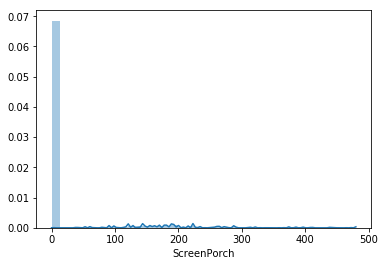

In [353]:
sns.distplot(clean_data['ScreenPorch'])
plt.show()

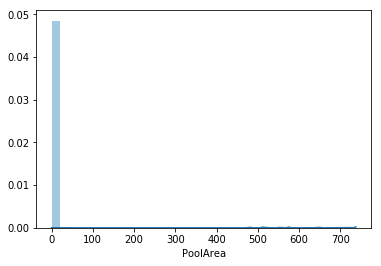

In [200]:
sns.distplot(clean_data['PoolArea']) #plotting the area of pool
plt.show()

The data in this column looks skewed since most of it is concentrated towards the value 0 for the pool area. So, we can drop this column.

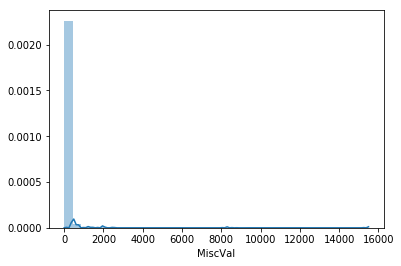

In [357]:
sns.distplot(clean_data['MiscVal'])
plt.show()

In [358]:
clean_data['SaleType'].value_counts()

WD       1158
New       117
COD        42
ConLD       6
CWD         4
ConLI       4
ConLw       4
Con         2
Oth         1
Name: SaleType, dtype: int64

In [359]:
#creating new column 'ConvWDSale' to better represent the data in column 'SaleType'
def Sale_Type(x):
    if x['SaleType'] == 'WD' :
        return 'Yes'
    else:
        return 'No'

clean_data["ConvWDSale"] = clean_data.apply(lambda x: Sale_Type(x), axis=1)
clean_data = clean_data.drop("SaleType",axis=1)
clean_data["ConvWDSale"].value_counts()

Yes    1158
No      180
Name: ConvWDSale, dtype: int64

In [360]:
clean_data['SaleCondition'].value_counts()

Normal     1104
Partial     120
Abnorml      86
Family       20
Alloca        7
AdjLand       1
Name: SaleCondition, dtype: int64

In [380]:
#creating new column 'NormalSale' to better represent the data in column 'SaleCondition'
def Sale_Condition(x):
    if x['SaleCondition'] == 'Normal' :
        return 'Yes'
    else:
        return 'No'

clean_data["NormalSale"] = clean_data.apply(lambda x: Sale_Condition(x), axis=1)
clean_data = clean_data.drop("SaleCondition",axis=1)
clean_data["NormalSale"].value_counts()

KeyError: ('SaleCondition', 'occurred at index 0')

In [379]:
clean_data['MoSold'].value_counts()

6     235
7     215
5     187
4     127
8     112
3      94
10     84
11     75
9      55
12     52
1      52
2      50
Name: MoSold, dtype: int64

Here, we can see that the number of sales during the first half of the financial year (April-September) is generally higher than that of the second half (October-March). We can club the months as 'JanFebMar','AprMayJun','JulAugSep', and 'OctNovDec'.

In [385]:
clean_data['MoSold'] = clean_data['MoSold'].replace([1,2,3],'JanFebMar')
clean_data['MoSold'] = clean_data['MoSold'].replace([4,5,6],'AprMayJun')
clean_data['MoSold'] = clean_data['MoSold'].replace([7,8,9],'JulAugSep')
clean_data['MoSold'] = clean_data['MoSold'].replace([10,11,12],'OctNovDec')
clean_data['MoSold'].value_counts()

AprMayJun    549
JulAugSep    382
OctNovDec    211
JanFebMar    196
Name: MoSold, dtype: int64

In [386]:
#deleting the columns with skewed data
new_data = clean_data.drop(['Street','PoolArea','LandContour','Utilities','LandSlope','Condition2','RoofMatl','MasVnrArea',
                            'BsmtFinSF2','Heating','CentralAir','Electrical','LowQualFinSF','BsmtHalfBath','Functional',
                            'GarageQual','GarageCond','PavedDrive','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal'],axis=1)
new_data.head()

Id  LotFrontage  LotArea Neighborhood HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea BsmtFullBath  FullBath HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF     MoSold  YrSold  SalePrice Property_Type LowResZone RegLotShape InsideLot NormCond Detach1Fam GableRoof MultiTypBsmt ConvWDSale NormalSale
0   1         65.0     8450      CollgCr     2Story            7            5       2003          2003     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ         706        150          856        Ex       856       854       1710          Yes         2      Yes             3             1          Gd             8         No          NA     Attchd       2003.0          Yes           2         548           0           61  JanFebMar    2008     208500         2_Str        Yes         Yes       Yes      Yes        Yes       Yes           No        Yes        Yes
1   2         80.0     9600       Others     1Story            6            8       1976          1976     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ         978        284         1262        Ex      1262         0       1262           No         2       No             3             1          TA             6        Yes          TA     Attchd       1976.0          Yes           2         460         298            0  AprMayJun    2007     181500         1_Str        Yes         Yes        No       No        Yes       Yes           No        Yes        Yes
2   3         68.0    11250      CollgCr     2Story            7            5       2001          2002     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ         486        434          920        Ex       920       866       1786          Yes         2      Yes             3             1          Gd             6        Yes          TA     Attchd       2001.0          Yes           2         608           0           42  JulAugSep    2008     223500         2_Str        Yes          No       Yes      Yes        Yes       Yes           No        Yes        Yes
3   4         60.0     9550      Crawfor     2Story            7            5       1915          1970     Wd Sdng       Other       None        TA        TA      Other       TA       Gd           No          ALQ         216        540          756        Gd       961       756       1717          Yes         1       No             3             1          Gd             7        Yes          Gd     Detchd       1998.0           No           3         642           0           35  JanFebMar    2006     140000         2_Str        Yes          No        No      Yes        Yes       Yes           No        Yes         No
4   5         84.0    14260      NoRidge     2Story            8            5       2000          2000     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ         655        490         1145        Ex      1145      1053       2198          Yes         2      Yes             4             1          Gd             9        Yes          TA     Attchd       2000.0          Yes           3         836         192           84  OctNovDec    2008     250000         2_Str        Yes          No        No      Yes        Yes       Yes           No        Yes        Yes

In [387]:
new_data.shape

(1338, 55)

In [388]:
new_data.dtypes

Id                 int64
LotFrontage      float64
LotArea            int64
Neighborhood      object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
Exterior1st       object
Exterior2nd       object
MasVnrType        object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC         object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath      object
FullBath           int64
HalfBath          object
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Fireplaces        object
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
GarageArea         int64


### Dealing with date columns

In [389]:
#converting data type of column 'GarageYrBlt' from float to integer
new_data['GarageYrBlt'] = new_data['GarageYrBlt'].astype(int)
new_data.dtypes

Id                 int64
LotFrontage      float64
LotArea            int64
Neighborhood      object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
Exterior1st       object
Exterior2nd       object
MasVnrType        object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC         object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath      object
FullBath           int64
HalfBath          object
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Fireplaces        object
FireplaceQu       object
GarageType        object
GarageYrBlt        int32
GarageFinish      object
GarageCars         int64
GarageArea         int64


In [390]:
#creating new column with the age of the property at the time of sale
new_data['PropertyAge'] = new_data['YrSold'] - new_data['YearBuilt']
new_data['PropertyAge'][:10]

0     5
1    31
2     7
3    91
4     8
5    16
6     3
7    36
8    77
9    69
Name: PropertyAge, dtype: int64

In [391]:
#creating new column with the years till the last remodel or addition from the time of sale
new_data['LastRemodelAddYrs'] = new_data['YrSold'] - new_data['YearRemodAdd']
new_data['LastRemodelAddYrs'][:10]

0     5
1    31
2     6
3    36
4     8
5    14
6     2
7    36
8    58
9    58
Name: LastRemodelAddYrs, dtype: int64

In [392]:
#creating new column with the age of garage in years at the time of sale
new_data['GarageAge'] = new_data['YrSold'] - new_data['GarageYrBlt']
new_data['GarageAge'][:10]

0     5
1    31
2     7
3     8
4     8
5    16
6     3
7    36
8    77
9    69
Name: GarageAge, dtype: int64

In [393]:
new_df = new_data.drop(['YrSold','GarageYrBlt','YearRemodAdd','YearBuilt'], axis=1)
new_df.head()

Id  LotFrontage  LotArea Neighborhood HouseStyle  OverallQual  OverallCond Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea BsmtFullBath  FullBath HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF     MoSold  SalePrice Property_Type LowResZone RegLotShape InsideLot NormCond Detach1Fam GableRoof MultiTypBsmt ConvWDSale NormalSale  PropertyAge  LastRemodelAddYrs  GarageAge
0   1         65.0     8450      CollgCr     2Story            7            5     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ         706        150          856        Ex       856       854       1710          Yes         2      Yes             3             1          Gd             8         No          NA     Attchd          Yes           2         548           0           61  JanFebMar     208500         2_Str        Yes         Yes       Yes      Yes        Yes       Yes           No        Yes        Yes            5                  5          5
1   2         80.0     9600       Others     1Story            6            8     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ         978        284         1262        Ex      1262         0       1262           No         2       No             3             1          TA             6        Yes          TA     Attchd          Yes           2         460         298            0  AprMayJun     181500         1_Str        Yes         Yes        No       No        Yes       Yes           No        Yes        Yes           31                 31         31
2   3         68.0    11250      CollgCr     2Story            7            5     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ         486        434          920        Ex       920       866       1786          Yes         2      Yes             3             1          Gd             6        Yes          TA     Attchd          Yes           2         608           0           42  JulAugSep     223500         2_Str        Yes          No       Yes      Yes        Yes       Yes           No        Yes        Yes            7                  6          7
3   4         60.0     9550      Crawfor     2Story            7            5     Wd Sdng       Other       None        TA        TA      Other       TA       Gd           No          ALQ         216        540          756        Gd       961       756       1717          Yes         1       No             3             1          Gd             7        Yes          Gd     Detchd           No           3         642           0           35  JanFebMar     140000         2_Str        Yes          No        No      Yes        Yes       Yes           No        Yes         No           91                 36          8
4   5         84.0    14260      NoRidge     2Story            8            5     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ         655        490         1145        Ex      1145      1053       2198          Yes         2      Yes             4             1          Gd             9        Yes          TA     Attchd          Yes           3         836         192           84  OctNovDec     250000         2_Str        Yes          No        No      Yes        Yes       Yes           No        Yes        Yes            8                  8          8

In [394]:
new_df.shape

(1338, 54)

## Preparing the data for modelling

### Treatment of target variable

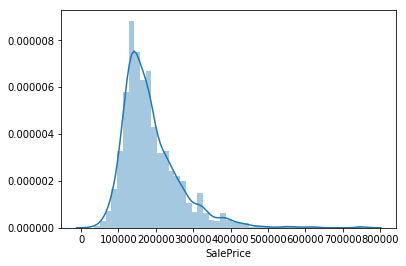

In [383]:
#plotting the distribution of the target variable
sns.distplot(new_df['SalePrice'])
plt.show()

Before we proceed further, we will have to make sure that the target variable is normally distributed. However, the above graph of the 'SalePrice' column doesn't indicate a normal distribution. Hence, we will have to take the log of the target variable.

In [519]:
new_df['LogSalePrice'] = np.log(new_df['SalePrice'])
new_df.head()

Id  LotFrontage  LotArea Neighborhood HouseStyle  OverallQual  OverallCond Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF     MoSold  SalePrice Property_Type  LowResZone  RegLotShape  InsideLot  NormCond  Detach1Fam  GableRoof  MultiTypBsmt  ConvWDSale  NormalSale  PropertyAge  LastRemodelAddYrs  GarageAge  LogSalePrice
0   1         65.0     8450      CollgCr     2Story            7            5     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ         706        150          856        Ex       856       854       1710             1         2         1             3             1          Gd             8           0          NA     Attchd             1           2         548           0           61  JanFebMar     208500         2_Str           1            1          1         1           1          1             0           1           1            5                  5          5     12.247694
1   2         80.0     9600       Others     1Story            6            8     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ         978        284         1262        Ex      1262         0       1262             0         2         0             3             1          TA             6           1          TA     Attchd             1           2         460         298            0  AprMayJun     181500         1_Str           1            1          0         0           1          1             0           1           1           31                 31         31     12.109011
2   3         68.0    11250      CollgCr     2Story            7            5     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ         486        434          920        Ex       920       866       1786             1         2         1             3             1          Gd             6           1          TA     Attchd             1           2         608           0           42  JulAugSep     223500         2_Str           1            0          1         1           1          1             0           1           1            7                  6          7     12.317167
3   4         60.0     9550      Crawfor     2Story            7            5     Wd Sdng       Other       None        TA        TA      Other       TA       Gd           No          ALQ         216        540          756        Gd       961       756       1717             1         1         0             3             1          Gd             7           1          Gd     Detchd             0           3         642           0           35  JanFebMar     140000         2_Str           1            0          0         1           1          1             0           1           0           91                 36          8     11.849398
4   5         84.0    14260      NoRidge     2Story            8            5     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ         655        490         1145        Ex      1145      1053       2198             1         2         1             4             1          Gd             9           1          TA     Attchd             1           3         836         192           84  OctNovDec     250000         2_Str           1            0          0         1           1          1             0           1           1            8                  8          8     12.429216

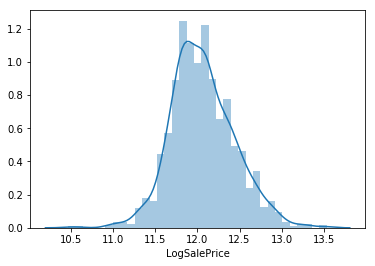

In [520]:
#plotting the distribution of the log of target variable
sns.distplot(new_df['LogSalePrice'])
plt.show()

We can see now that the plot showing the log of target variable is normally distributed.

### Replacing Yes/No columns with 0/1

In [402]:
# List of variables to map

varlist =  ['BsmtFullBath', 'HalfBath','Fireplaces','GarageFinish','LowResZone','RegLotShape','InsideLot','NormCond',
            'Detach1Fam','GableRoof','MultiTypBsmt','ConvWDSale','NormalSale']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
new_df[varlist] = new_df[varlist].apply(binary_map)
new_df.head()

Id  LotFrontage  LotArea Neighborhood HouseStyle  OverallQual  OverallCond Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF     MoSold  SalePrice Property_Type  LowResZone  RegLotShape  InsideLot  NormCond  Detach1Fam  GableRoof  MultiTypBsmt  ConvWDSale  NormalSale  PropertyAge  LastRemodelAddYrs  GarageAge  LogSalePrice
0   1         65.0     8450      CollgCr     2Story            7            5     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ         706        150          856        Ex       856       854       1710             1         2         1             3             1          Gd             8           0          NA     Attchd             1           2         548           0           61  JanFebMar     208500         2_Str           1            1          1         1           1          1             0           1           1            5                  5          5     12.247694
1   2         80.0     9600       Others     1Story            6            8     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ         978        284         1262        Ex      1262         0       1262             0         2         0             3             1          TA             6           1          TA     Attchd             1           2         460         298            0  AprMayJun     181500         1_Str           1            1          0         0           1          1             0           1           1           31                 31         31     12.109011
2   3         68.0    11250      CollgCr     2Story            7            5     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ         486        434          920        Ex       920       866       1786             1         2         1             3             1          Gd             6           1          TA     Attchd             1           2         608           0           42  JulAugSep     223500         2_Str           1            0          1         1           1          1             0           1           1            7                  6          7     12.317167
3   4         60.0     9550      Crawfor     2Story            7            5     Wd Sdng       Other       None        TA        TA      Other       TA       Gd           No          ALQ         216        540          756        Gd       961       756       1717             1         1         0             3             1          Gd             7           1          Gd     Detchd             0           3         642           0           35  JanFebMar     140000         2_Str           1            0          0         1           1          1             0           1           0           91                 36          8     11.849398
4   5         84.0    14260      NoRidge     2Story            8            5     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ         655        490         1145        Ex      1145      1053       2198             1         2         1             4             1          Gd             9           1          TA     Attchd             1           3         836         192           84  OctNovDec     250000         2_Str           1            0          0         1           1          1             0           1           1            8                  8          8     12.429216

### Creating dummy variables of categorical columns

In [626]:
var = ['Neighborhood','HouseStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
       'BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','FireplaceQu','GarageType','MoSold','Property_Type',
      'OverallQual','OverallCond']
temp = pd.get_dummies(new_df[var], drop_first = True)
dummy_df = pd.concat([new_df, temp], axis = 1)
dummy_df.drop(var, axis=1, inplace = True)
dummy_df.head()

Id  LotFrontage  LotArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  LowResZone  RegLotShape  InsideLot  NormCond  Detach1Fam  GableRoof  MultiTypBsmt  ConvWDSale  NormalSale  PropertyAge  LastRemodelAddYrs  GarageAge  LogSalePrice  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_Others  Neighborhood_Sawyer  Neighborhood_SawyerW        ...          Exterior2nd_Other  Exterior2nd_Plywood  Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  ExterCond_Fa  ExterCond_Gd  ExterCond_TA  \
0   1         65.0     8450         706        150          856       856       854       1710             1         2         1             3             1             8           0             1           2         548           0           61     208500           1            1          1         1           1          1             0           1           1            5                  5          5     12.247694                     0                     1                     0                     0                     0                    0                     0                   0                    0                     0                     0                     0                    0                    0                     0        ...                          0                    0                    1                    0                   1                0                 0             0             1             0             0             0             1   
1   2         80.0     9600         978        284         1262      1262         0       1262             0         2         0             3             1             6           1             1           2         460         298            0     181500           1            1          0         0           1          1             0           1           1           31                 31         31     12.109011                     0                     0                     0                     0                     0                    0                     0                   0                    0                     0                     0                     0                    1                    0                     0        ...                          0                    0                    0                    0                   0                1                 0             0             0             1             0             0             1   
2   3         68.0    11250         486        434          920       920       866       1786             1         2         1             3             1             6           1             1           2         608           0           42     223500           1            0          1         1           1          1             0           1           1            7                  6          7     12.317167                     0                     1                     0                     0                     0                    0                     0                   0                    0                     0                     0                     0                    0                    0                     0        ...                          0                    0                    1                    0                   1                0                 0             0             1             0             0             0             1   
3   4         60.0     9550         216        540 

In [623]:
dummy_df.shape

(1338, 112)

In [415]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Columns: 112 entries, Id to Property_Type_PUD
dtypes: float64(2), int64(33), uint8(77)
memory usage: 476.9 KB


### Checking for outliers

In [422]:
#checking the continous variables in the data for outliers
temp = ['LotFrontage','LotArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath',
        'BedroomAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','PropertyAge','LastRemodelAddYrs',
        'GarageAge']
dummy_df[temp].describe(percentiles=[.25, .5, .75, .90, .95, .99])

LotFrontage        LotArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea     FullBath  BedroomAbvGr  TotRmsAbvGrd  GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  PropertyAge  LastRemodelAddYrs    GarageAge
count  1338.000000    1338.000000  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000   1338.000000  1338.00000  1338.000000  1338.000000  1338.000000  1338.000000        1338.000000  1338.000000
mean     70.438714   10706.294469   464.234679   582.494768  1095.947683  1176.221973   357.141256  1537.585202     1.575486      2.864723      6.550075     1.87145   501.449925    99.384903    47.782511    34.776532          22.136771    29.209268
std      22.170305   10336.621126   458.792420   439.950528   405.554435   386.644986   440.324982   520.579960     0.547570      0.776677      1.585071     0.63428   186.761863   127.537065    65.362562    29.603970          20.294171    24.813371
min      21.000000    1300.000000     0.000000     0.000000   105.000000   438.000000     0.000000   438.000000     0.000000      0.000000      3.000000     1.00000   160.000000     0.000000     0.000000     0.000000          -1.000000     0.000000
25%      60.000000    7744.000000     0.000000   248.000000   819.750000   894.000000     0.000000  1160.000000     1.000000      2.000000      5.000000     1.00000   377.500000     0.000000     0.000000     7.000000           4.000000     6.000000
50%      69.000000    9600.000000   413.000000   489.000000  1021.500000  1098.000000     0.000000  1480.000000     2.000000      3.000000      6.000000     2.00000   484.000000     6.000000    28.000000    33.000000          14.000000    28.000000
75%      80.000000   11760.750000   733.000000   815.750000  1324.000000  1414.000000   740.500000  1791.500000     2.000000      3.000000      7.000000     2.00000   583.000000   174.500000    70.000000    52.000000          39.750000    46.750000
90%      93.000000   14575.900000  1079.900000  1242.700000  1616.300000  1686.300000   975.600000  2175.300000     2.000000      4.000000      9.000000     3.00000   772.600000   264.300000   130.000000    81.000000          56.000000    65.000000
95%     105.000000   17508.850000  1280.300000  1480.300000  1754.500000  1838.150000  1151.150000  2485.300000     2.000000      4.000000     10.000000     3.00000   857.150000   342.300000   172.300000    89.000000          58.000000    79.000000
99%     135.890000   39727.700000  1593.790000  1798.150000  2156.150000  2220.780000  1405.860000  3129.640000     3.000000      5.000000     11.000000     3.00000  1017.780000   510.260000   283.890000   110.000000          60.000000    90.630000
max     313.000000  215245.000000  5644.000000  2336.000000  6110.000000  4692.000000  2065.000000  5642.000000     3.000000      6.000000     12.000000     4.00000  1418.000000   857.000000   547.000000   129.000000          60.000000   107.000000

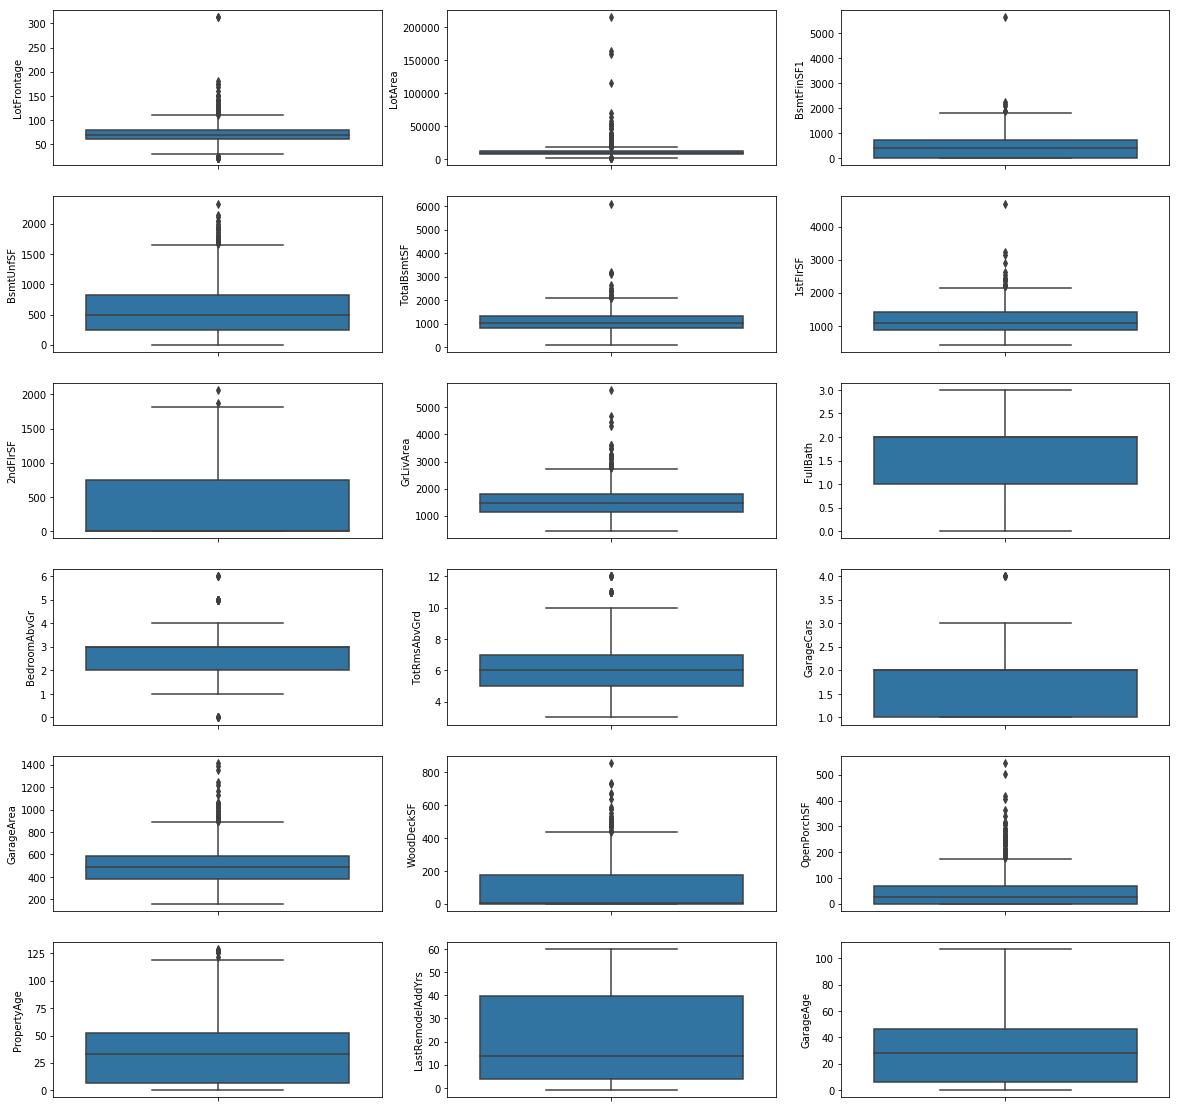

In [428]:
#visualising the data columns to better check for outliers
plt.figure(figsize = (20,20))
for i in enumerate(temp):
    plt.subplot(6,3,i[0]+1)
    sns.boxplot(y = i[1], data = dummy_df)

We can see that there are outliers present in some of columns with continuous data. However, we will be retaining the same for the creation of the model.

### Scaling the data

In [627]:
#dropping 'Id' and 'SalePrice' columns
dummy_df = dummy_df.drop(['Id', 'SalePrice'],axis=1)

In [628]:
from sklearn.model_selection import train_test_split

#splitting the available dataset into train data and test data
df_train, df_test = train_test_split(dummy_df, train_size=0.7, test_size=0.3, random_state=100)

In [629]:
# scaling the features in X dataset
from sklearn.preprocessing import scale

cols = df_train.columns #storing the names of the columns to be used after scaling
df_train = pd.DataFrame(scale(df_train))
df_train.columns = cols
df_train.columns

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       ...
       'FireplaceQu_TA', 'GarageType_Detchd', 'GarageType_Other', 'MoSold_JanFebMar', 'MoSold_JulAugSep', 'MoSold_OctNovDec', 'Property_Type_1_Str', 'Property_Type_2_Str', 'Property_Type_Others', 'Property_Type_PUD'], dtype='object', length=110)

In [631]:
# we will split the dataset into X (independent variables) and y (target variable)
y_train = df_train.pop('LogSalePrice')
X_train = df_train

## Model creation and evaluation

### Feature Selection Using RFE

We will be performing RFE (recursive feature elimination) to reduce the number of predictor variables since the number of features in the dataset is extremely high right now.

In [635]:
from sklearn.feature_selection import RFE

lin_reg = LinearRegression()
rfe = RFE(lin_reg, 18)             # running RFE to filter 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [636]:
rfe.support_

array([False, False, False,  True,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

In [637]:
rfe.ranking_

array([49,  4, 61,  1,  1,  7, 65,  1, 90, 44, 45, 76,  1,  5, 26, 55, 16,
        1, 85, 82, 34, 52, 24, 15, 63, 79, 84,  3,  2,  1,  1, 23, 83, 40,
        1,  6, 41, 19, 39, 36, 37, 66,  9, 18, 38, 35, 42, 10, 11, 54, 68,
        1, 87, 20, 50, 81, 47, 73, 21, 60, 78, 25, 51,  1,  1,  1, 46, 91,
       43, 31, 33, 32, 48, 59, 28, 30, 29,  1, 53,  1, 13, 64, 77, 89, 17,
       56, 88, 80, 67, 71, 74, 14,  1,  1,  1, 86, 72,  8, 58, 70, 27, 22,
       57, 92, 62, 75,  1, 69, 12])

In [638]:
#all columns from train dataset based on their ranking and selection boolean
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 49),
 ('LotArea', False, 4),
 ('BsmtFinSF1', False, 61),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 7),
 ('2ndFlrSF', False, 65),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 90),
 ('FullBath', False, 44),
 ('HalfBath', False, 45),
 ('BedroomAbvGr', False, 76),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 5),
 ('Fireplaces', False, 26),
 ('GarageFinish', False, 55),
 ('GarageCars', False, 16),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 85),
 ('OpenPorchSF', False, 82),
 ('LowResZone', False, 34),
 ('RegLotShape', False, 52),
 ('InsideLot', False, 24),
 ('NormCond', False, 15),
 ('Detach1Fam', False, 63),
 ('GableRoof', False, 79),
 ('MultiTypBsmt', False, 84),
 ('ConvWDSale', False, 3),
 ('NormalSale', False, 2),
 ('PropertyAge', True, 1),
 ('LastRemodelAddYrs', True, 1),
 ('GarageAge', False, 23),
 ('Neighborhood_ClearCr', False, 83),
 ('Neighborhood_CollgCr', False, 40),
 ('Neighborhood_Crawfor', True, 1),
 ('Ne

In [640]:
rfe_col = X_train.columns[rfe.support_] #filtering the columns that are selected
X_train.columns[~rfe.support_] #the columns that are not selected

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'LowResZone', 'RegLotShape', 'InsideLot', 'NormCond', 'Detach1Fam', 'GableRoof', 'MultiTypBsmt', 'ConvWDSale', 'NormalSale', 'GarageAge', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Others', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'HouseStyle_1Story', 'HouseStyle_Others', 'Exterior1st_MetalSd', 'Exterior1st_Others', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood',
       'Exterior2nd_Vi

In [656]:
X_train.columns[rfe.support_] #columns selected from RFE

Index(['BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'PropertyAge', 'LastRemodelAddYrs', 'Neighborhood_Crawfor', 'HouseStyle_2Story', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'BsmtCond_Gd', 'BsmtCond_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Property_Type_2_Str'], dtype='object')

### Modeling based on features from RFE

#### Ridge Regression

In [641]:
#making a list of values for alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 75, 100, 125, 150, 200, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 30
R_model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
R_model.fit(X_train[rfe_col], y_train)

Fitting 30 folds for each of 32 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:    8.3s finished
D:\upGrad\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=30, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 75, 100, 125, 150, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [642]:
#checking the optimum value for alpha
R_model.best_params_

{'alpha': 10.0}

In [643]:
R_results = pd.DataFrame(R_model.cv_results_) #making a dataframe of the results from cross validation
R_results = R_results[R_results['param_alpha']<=200]
R_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  split5_test_score  split6_test_score  split7_test_score  split8_test_score  split9_test_score  split10_test_score  split11_test_score  split12_test_score  split13_test_score  split14_test_score  split15_test_score  split16_test_score  split17_test_score  split18_test_score  split19_test_score  split20_test_score  split21_test_score  split22_test_score  split23_test_score  split24_test_score  split25_test_score  split26_test_score  split27_test_score  split28_test_score  split29_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  split5_train_score  split6_train_score  split7_train_score  split8_train_score  split9_train_score  split10_train_score  split11_train_score  split12_train_score  \
0       0.022133      0.086589         0.001555        0.002458      0.0001  {'alpha': 0.0001}          -0.272035          -0.230835          -0.288269          -0.262372          -0.278581          -0.415163          -0.254509          -0.260466          -0.234984          -0.262277           -0.280553           -0.297340           -0.208317           -0.187624           -0.279638           -0.228888           -0.438026           -0.335814           -0.268539           -0.282722           -0.249145           -0.199599           -0.266411           -0.265848           -0.209602           -0.286355           -0.230399           -0.252894           -0.254875           -0.228684        -0.267180        0.052836               24           -0.259885           -0.261044           -0.258757           -0.260422           -0.259171           -0.254113           -0.260242           -0.260125           -0.260644           -0.260070            -0.259398            -0.257433            -0.261926   
1       0.003365      0.000547         0.001199        0.000400       0.001   {'alpha': 0.001}          -0.272034          -0.230835          -0.288268          -0.262372          -0.278582          -0.415162          -0.254509          -0.260466          -0.234984          -0.262277           -0.280554           -0.297340           -0.208316           -0.187624           -0.279638           -0.228887           -0.438026           -0.335814           -0.268539           -0.282722           -0.249145           -0.199598           -0.266411           -0.265848           -0.209602           -0.286355           -0.230399           -0.252893           -0.254875           -0.228683        -0.267180        0.052837               23           -0.259885           -0.261044           -0.258757           -0.260422           -0.259171           -0.254113           -0.260242           -0.260125           -0.260644           -0.260070            -0.259398            -0.257433            -0.261926   
2       0.003632      0.003431         0.001132        0.000340        0.01    {'alpha': 0.01}          -0.272030          -0.230833          -0.288257          -0.262372          -0.278586          -0.415160          -0.254514          -0.260465          -0.234986          -0.262278           -0.280558           -0.297340           -0.208312           -0.187624           -0.279638           -0.228883           -0.438029           -0.335816           -0.268533           -0.282720           -0.249141           -0.199593           -0.266409           -0.265850           -0.209600           -0.286359           -0.230402           -0.252889           -0.254873           -0.228681        -0.267179        0.052837               22           -0.259885           -0.261043           -0.258757           -0.260422           -0.259171           -0.254113           -0.260241           -0.260124           -0.260644           -0.260070            -0.259398            -0.257433            -0.261925   

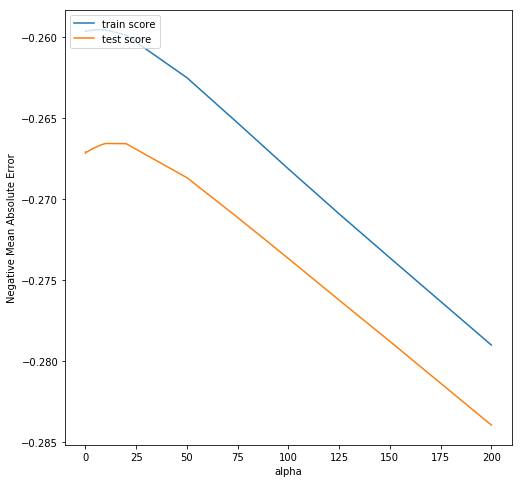

In [644]:
# plotting mean test and train scoes with alpha 
R_results['param_alpha'] = R_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize = (8,8))
plt.plot(R_results['param_alpha'], R_results['mean_train_score'])
plt.plot(R_results['param_alpha'], R_results['mean_test_score'])
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('alpha')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the graph mentioned above, we can see that the Negative Mean Absolute Error for the test data during cross validation is highest when the value of alpha is 10. Hence, we will be selecting this value of alpha to perform ridge regression on our test dataset.

In [645]:
ridge_alpha = 10 #selecting alpha as 10
ridge = Ridge(alpha=ridge_alpha)

ridge.fit(X_test[rfe_col], np.exp(y_test))
ridge.coef_

array([-4.21591459e+00, -2.13594745e-01,  7.64041422e+01, -1.87883223e+04,
        3.68333131e+01, -6.61798197e+02, -5.74729330e+02,  1.73683971e+04,
       -3.18401131e+04,  3.69825935e+02, -1.01876332e+04,  1.54459463e+04,
        6.04009987e+03,  5.35643483e+03, -5.56028844e+03, -2.81858605e+04,
       -3.35377489e+04,  1.18193953e+04])

### Lasso Regression

In [648]:
lasso = Lasso()

# cross validation
L_model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

L_model.fit(X_train[rfe_col], y_train)

Fitting 30 folds for each of 32 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:    6.8s finished
D:\upGrad\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=30, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 75, 100, 125, 150, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [649]:
L_model.best_params_

{'alpha': 0.001}

In [650]:
L_results = pd.DataFrame(L_model.cv_results_)
L_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  split5_test_score  split6_test_score  split7_test_score  split8_test_score  split9_test_score  split10_test_score  split11_test_score  split12_test_score  split13_test_score  split14_test_score  split15_test_score  split16_test_score  split17_test_score  split18_test_score  split19_test_score  split20_test_score  split21_test_score  split22_test_score  split23_test_score  split24_test_score  split25_test_score  split26_test_score  split27_test_score  split28_test_score  split29_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  split5_train_score  split6_train_score  split7_train_score  split8_train_score  split9_train_score  split10_train_score  split11_train_score  split12_train_score  \
0       0.008028      0.001642         0.001534        0.000561      0.0001  {'alpha': 0.0001}          -0.271785          -0.230793          -0.287729          -0.262538          -0.278838          -0.414891          -0.254935          -0.260480          -0.235030          -0.262356           -0.281154           -0.297338           -0.208173           -0.187596           -0.279704           -0.228578           -0.438341           -0.335951           -0.268119           -0.282491           -0.248935           -0.199248           -0.266418           -0.265966           -0.209462           -0.286436           -0.230691           -0.252681           -0.254936           -0.228541        -0.267159        0.052879                2           -0.259870           -0.261026           -0.258746           -0.260402           -0.259146           -0.254093           -0.260207           -0.260106           -0.260631           -0.260046            -0.259397            -0.257411            -0.261906   
1       0.007595      0.001428         0.001933        0.000511       0.001   {'alpha': 0.001}          -0.269551          -0.230418          -0.282884          -0.264025          -0.281146          -0.412445          -0.259149          -0.260711          -0.235448          -0.263107           -0.286513           -0.297416           -0.206928           -0.187335           -0.280302           -0.225797           -0.441151           -0.337180           -0.264347           -0.280424           -0.247046           -0.196108           -0.266476           -0.267031           -0.209113           -0.287167           -0.233304           -0.250780           -0.255485           -0.227276        -0.267018        0.053270                1           -0.259801           -0.260942           -0.258661           -0.260296           -0.258995           -0.253975           -0.259933           -0.259982           -0.260559           -0.259882            -0.259443            -0.257306            -0.261797   
2       0.005598      0.000712         0.001898        0.000300        0.01    {'alpha': 0.01}          -0.272694          -0.232973          -0.271810          -0.269566          -0.300379          -0.388886          -0.285311          -0.264843          -0.249802          -0.269606           -0.282714           -0.311635           -0.204491           -0.183224           -0.289706           -0.202372           -0.453788           -0.346281           -0.266150           -0.280336           -0.236640           -0.211976           -0.278318           -0.282415           -0.213245           -0.297624           -0.240870           -0.269322           -0.259237           -0.259210        -0.272622        0.053244                3           -0.266242           -0.267675           -0.265488           -0.267011           -0.265624           -0.260922           -0.265816           -0.266436           -0.267112           -0.266298            -0.265382            -0.264260            -0.268712   

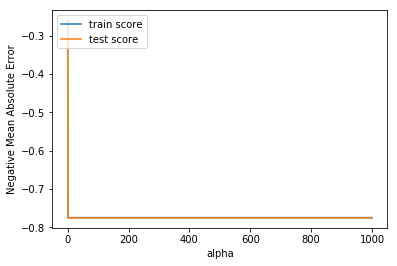

In [651]:
# plotting mean test and train scoes with alpha 
L_results['param_alpha'] = L_results['param_alpha'].astype('float32')
plt.plot(L_results['param_alpha'], L_results['mean_train_score'])
plt.plot(L_results['param_alpha'], L_results['mean_test_score'])
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('alpha')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

The above graph shows that the value of alpha should be very close to 0 as the Negative Mean Absolute Error for the test data in this type of regression is highest around 0 and then dips drastically. Therefore, we will be selecting this value of alpha to perform lasso regression on our test dataset.

In [654]:
lasso_alpha = 0.001 #using the value of alpha as 0.001

lasso = Lasso(alpha= lasso_alpha)
        
lasso.fit(X_test[rfe_col], np.exp(y_test)) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [655]:
lasso.coef_

array([-3.50314848e+00, -1.27949912e+01,  7.79649299e+01, -2.71017156e+04,
        3.49653223e+01, -6.65434718e+02, -4.30604815e+02,  3.28229851e+04,
       -5.36089148e+04,  2.35060689e+04,  1.23847592e+04,  4.34828154e+04,
        2.17411818e+04,  1.85978113e+04, -4.79226844e+04, -5.89668328e+04,
       -6.87181265e+04,  3.03883712e+04])

Hence, the models using Ridge and Lasso regression are created to predict the housing price.